In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv("trainnn.csv")
dt=dt.sample(100000)

In [3]:
dt.head()

,id,qid1,qid2,question1,question2,is_duplicate
44044,44044,2374,17812,Why do so may people ask questions on Quora th...,Why do so many people on Quora ask stupid ques...,1
309167,309167,135210,27105,What is an orbital designation?,What is an orbital?,0
103561,103561,171152,171153,Where does Newton's law of cooling fail and why?,What's wrong with Newton's law of cooling?,1
55144,55144,97246,97247,How do I hack Shadow Fight 2?,Can any one provide me link to download nuendo...,0
299366,299366,422002,59808,What is bookmark?,What is bookmarking?,0


In [4]:
dt.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
dt[dt["question1"].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate


In [6]:
dt[dt["question2"].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 44044 to 194760
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   qid1          100000 non-null  int64 
 2   qid2          100000 non-null  int64 
 3   question1     100000 non-null  object
 4   question2     100000 non-null  object
 5   is_duplicate  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ MB


In [8]:
dt.head()

,id,qid1,qid2,question1,question2,is_duplicate
44044,44044,2374,17812,Why do so may people ask questions on Quora th...,Why do so many people on Quora ask stupid ques...,1
309167,309167,135210,27105,What is an orbital designation?,What is an orbital?,0
103561,103561,171152,171153,Where does Newton's law of cooling fail and why?,What's wrong with Newton's law of cooling?,1
55144,55144,97246,97247,How do I hack Shadow Fight 2?,Can any one provide me link to download nuendo...,0
299366,299366,422002,59808,What is bookmark?,What is bookmarking?,0


In [9]:
dt.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
42169,42169,76027,76028,How do I start a car rental business? How do I...,What is the worst thing about the car rental b...,0
128514,128514,206656,206657,What is it like to live in Canada?,How does it feel to live in Canada?,1
400348,400348,505494,533701,How do I get to study?,How can I get myself to study?,0
104730,104730,172855,172856,Does Australia have street food?,Should street food be banned?,0
163593,163593,196680,90396,What are Balaji Viswanathan's views on astrology?,What are Balaji Vishwanathan's views on astrol...,1
13994,13994,26825,26826,What is the difference between scripting langu...,What is the major difference between a scripti...,1
191020,191020,290261,290262,What is the best way for a group of 6 with £10...,What is the possible ways of distributing 10 i...,0
335007,335007,449140,462257,Did Narendra Modi's reference to Gilgit-Baltis...,Why are Indian PM Narendra Modi's comments on ...,0
109744,109744,180066,180067,What is file system in Linux?,How do mounted file systems communicate to ker...,0
189923,189923,288841,241885,Is there bisexuality/homosexuality in animals?,Why are there no gay animals?,1


In [10]:
dt.dropna(inplace=True) 

In [11]:
dt.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<Axes: >

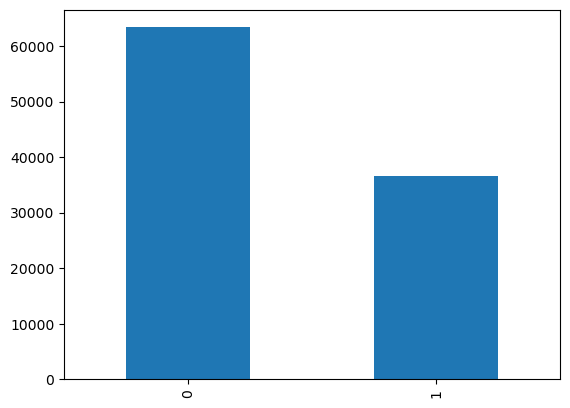

In [12]:
dt.is_duplicate.value_counts().plot(kind="bar")

In [13]:
dt.duplicated().sum()

0

In [14]:
qid=pd.Series(dt["qid1"].tolist() + dt["qid2"].tolist())
print("number of unique questions: ", qid.nunique())
x=qid.value_counts()>1
print("number of total questions: ", x[x].shape[0])

number of unique questions:  166465
number of total questions:  19194


# New Features

In [15]:
dt["q1_len"]=dt["question1"].str.len()
dt["q2_len"]=dt["question2"].str.len()

In [16]:
dt.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
386063,386063,242778,518235,What are some motivational pics that inspire you?,What are some motivational pictures that inspi...,1,49,54
30886,30886,56984,56985,"How do I understand ""knock knock"" jokes?","What are some of the best ""knock knock"" jokes?",0,40,46
86219,86219,145444,145445,What is an adult massage?,Are Asian massages safe?,0,25,24
138315,138315,220275,220276,What is the difference between assumption and ...,How does a PMP certificate stand against a pro...,0,80,138
287138,287138,407842,407843,What was the most emotional death in Naruto?,What will happen to Kurma after naruto's death?,0,44,47


In [17]:
dt["q1_num_words"]=dt["question1"].str.split().apply(len)
dt["q2_num_words"]=dt["question2"].str.split().apply(len)

In [18]:
dt.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
164390,164390,26204,255458,Is Henry Girard a real life person?,Is Peter Parker inspired by a real person?,0,35,42,7,8
56262,56262,99062,99063,What is mean by caveat petition in Indian court?,What does petition mean?,0,48,24,9,4
110660,110660,181397,181398,Why is radioactivity lethal to human beings?,What is radioactivity?,0,44,22,7,3
106190,106190,174972,174973,What is a liquidity adjustment facility?,What is marginal standing facility?,0,40,35,6,5
215509,215509,321419,321420,"What are pay scale of IAS, IPS, IFS and Group ...",What is the starting salary of a IAS officer i...,0,57,79,12,16


In [19]:
def common_word(text):
    w1=set(map(lambda word:word.lower().strip(),text["question1"].split()))
    w2=set(map(lambda word:word.lower().strip(),text["question2"].split()))
    return len(w1 & w2)

In [20]:
dt["word_common"]=dt.apply(common_word,axis=1)
dt.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
144025,144025,228058,228059,Which is the best photo you clicked using your...,What camera phones and/or phone apps take the ...,0,60,100,11,17,3
370559,370559,501125,501126,How do I turn my life around and ditch old fri...,How can I bring back life in old shoes and san...,0,86,51,18,11,5
63337,63337,110241,110242,What should someone know before moving to Austin?,"What should I know before moving to Tyler, TX?",0,49,46,8,9,6
86850,86850,146379,146380,There is negative markings in elitmus?,Is there any negative marking in elitmus and a...,0,38,57,6,10,4
279046,279046,159370,61532,How can I learn Number Theory online?,How can I get started to learn number theory?,1,37,45,7,9,5


In [21]:
def total_word(text):
    w1=set(map(lambda word:word.lower().strip(),text["question1"].split()))
    w2=set(map(lambda word:word.lower().strip(),text["question2"].split()))
    return len(w1)+len(w2)

In [22]:
dt["word_total"]=dt.apply(total_word,axis=1)

In [23]:
dt["word_share"]=round(dt["word_common"]/dt["word_total"],2)

In [24]:
sns.boxplot(dt["q1_len"])

KeyError: 0

In [25]:
dt.index=np.arange(0,dt.shape[0])
dt.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=100000)

In [26]:
from scipy import stats
zscores=stats.zscore(dt["q1_len"])

outliers=dt[np.abs(zscores>3)]

In [27]:
zscores=stats.zscore(dt["q2_len"])
outliers=dt[np.abs(zscores>3)]

In [28]:
dt.drop(index=outliers.index,inplace=True)

In [29]:
dt.shape[0]

98775

<Axes: >

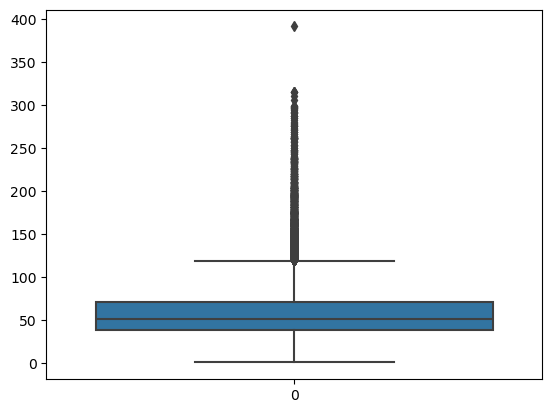

In [30]:
sns.boxplot(dt["q1_len"])

<Axes: >

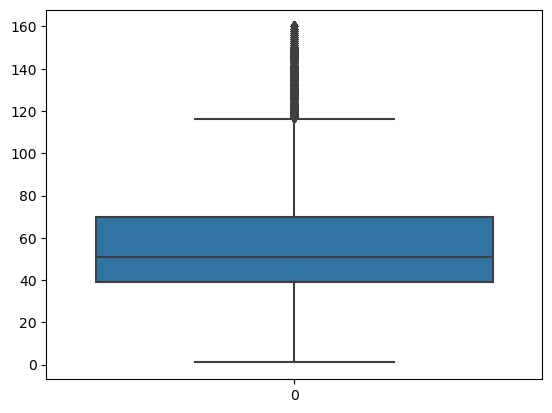

In [31]:
sns.boxplot(dt["q2_len"])

In [32]:
question_df=dt[["question1","question2"]]
final_df=dt[["is_duplicate","q1_len","q2_len","q1_num_words","q2_num_words","word_common","word_total","word_share"]]   

# Bag of words

In [33]:
question_df=dt[["question1","question2"]]
final_df=dt[["is_duplicate","q1_len","q2_len","q1_num_words","q2_num_words","word_common","word_total","word_share"]]   

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

Question=list(question_df["question1"])+list(question_df["question2"])
cv=CountVectorizer(max_features=5000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(Question).toarray(),2)

In [35]:
temp_df1=pd.DataFrame(q1_arr,index=question_df.index)
temp_df2=pd.DataFrame(q2_arr,index=question_df.index)

In [36]:
temp=pd.concat([temp_df1,temp_df2],axis=1)

In [37]:
final_df=pd.concat([final_df,temp],axis=1)

In [38]:
final_df.shape

(98775, 10008)

In [39]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,94,133,19,26,9,43,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,19,5,4,3,9,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,48,42,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,29,70,7,14,1,21,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,17,20,3,3,2,6,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(final_df.drop(columns="is_duplicate"),final_df["is_duplicate"],test_size=0.2,random_state=42)

In [42]:
x_train.columns=[str(i) for i in x_train.columns]

In [43]:
x_test.columns=[str(i) for i in x_test.columns]

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7935206276891926